In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_15000.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_50000.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_5000.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/aids-virus-infection-prediction/AIDS_Classification.csv')

In [4]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [6]:
df.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [7]:
df = df.drop_duplicates()

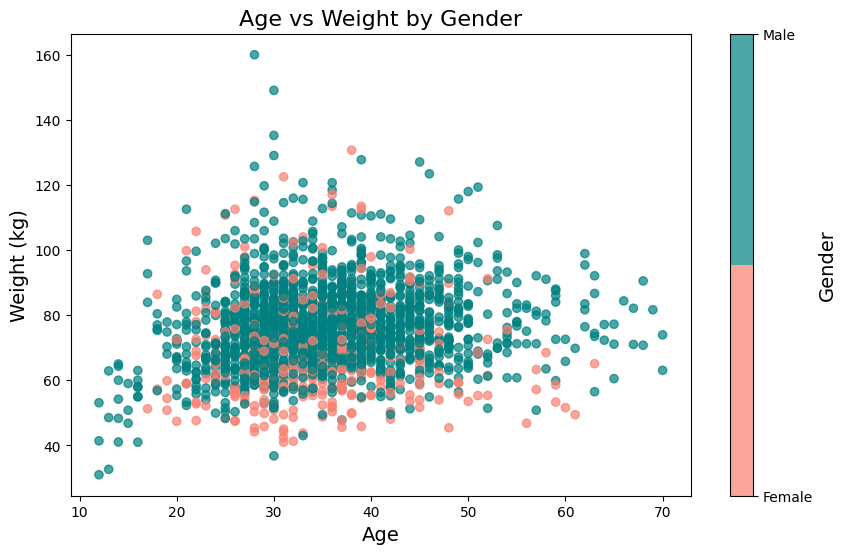

In [8]:
# Scatter plot with custom colors and labels
plt.figure(figsize=(10, 6))

custom_cmap = mcolors.ListedColormap(['Salmon', 'teal'])

plt.scatter(df['age'], df['wtkg'], c=df['gender'], cmap=custom_cmap, alpha=0.7)

plt.title('Age vs Weight by Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)

# Add a colorbar with custom tick labels
cbar = plt.colorbar()
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Female', 'Male'])
cbar.set_label('Gender', fontsize=14)

plt.show()

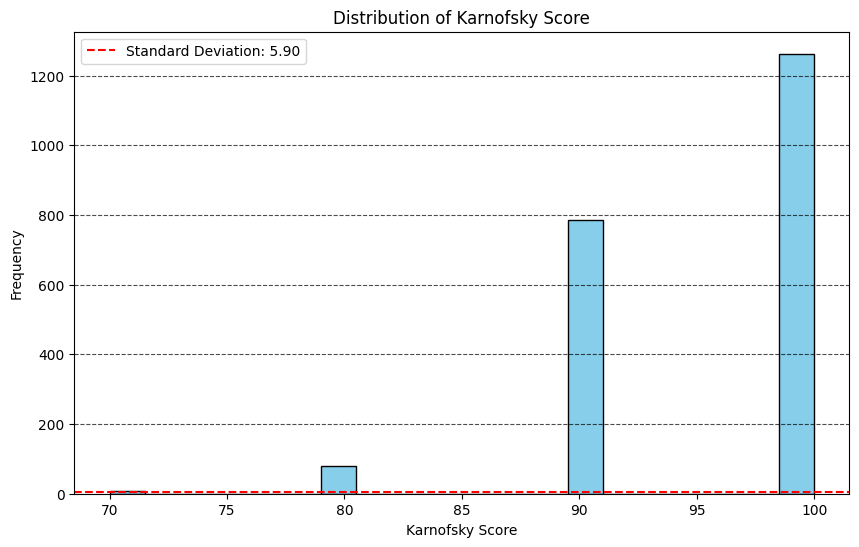

In [9]:
# Calculate standard deviation
std_dev = np.std(df['karnof'])

# Plotting histogram for 'karnof' attribute
plt.figure(figsize=(10, 6))
plt.hist(df['karnof'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Karnofsky Score')
plt.xlabel('Karnofsky Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='black')

# Display standard deviation on the grid line
plt.gca().axhline(std_dev, color='red', linestyle='--', label=f'Standard Deviation: {std_dev:.2f}')
plt.legend()
plt.show()

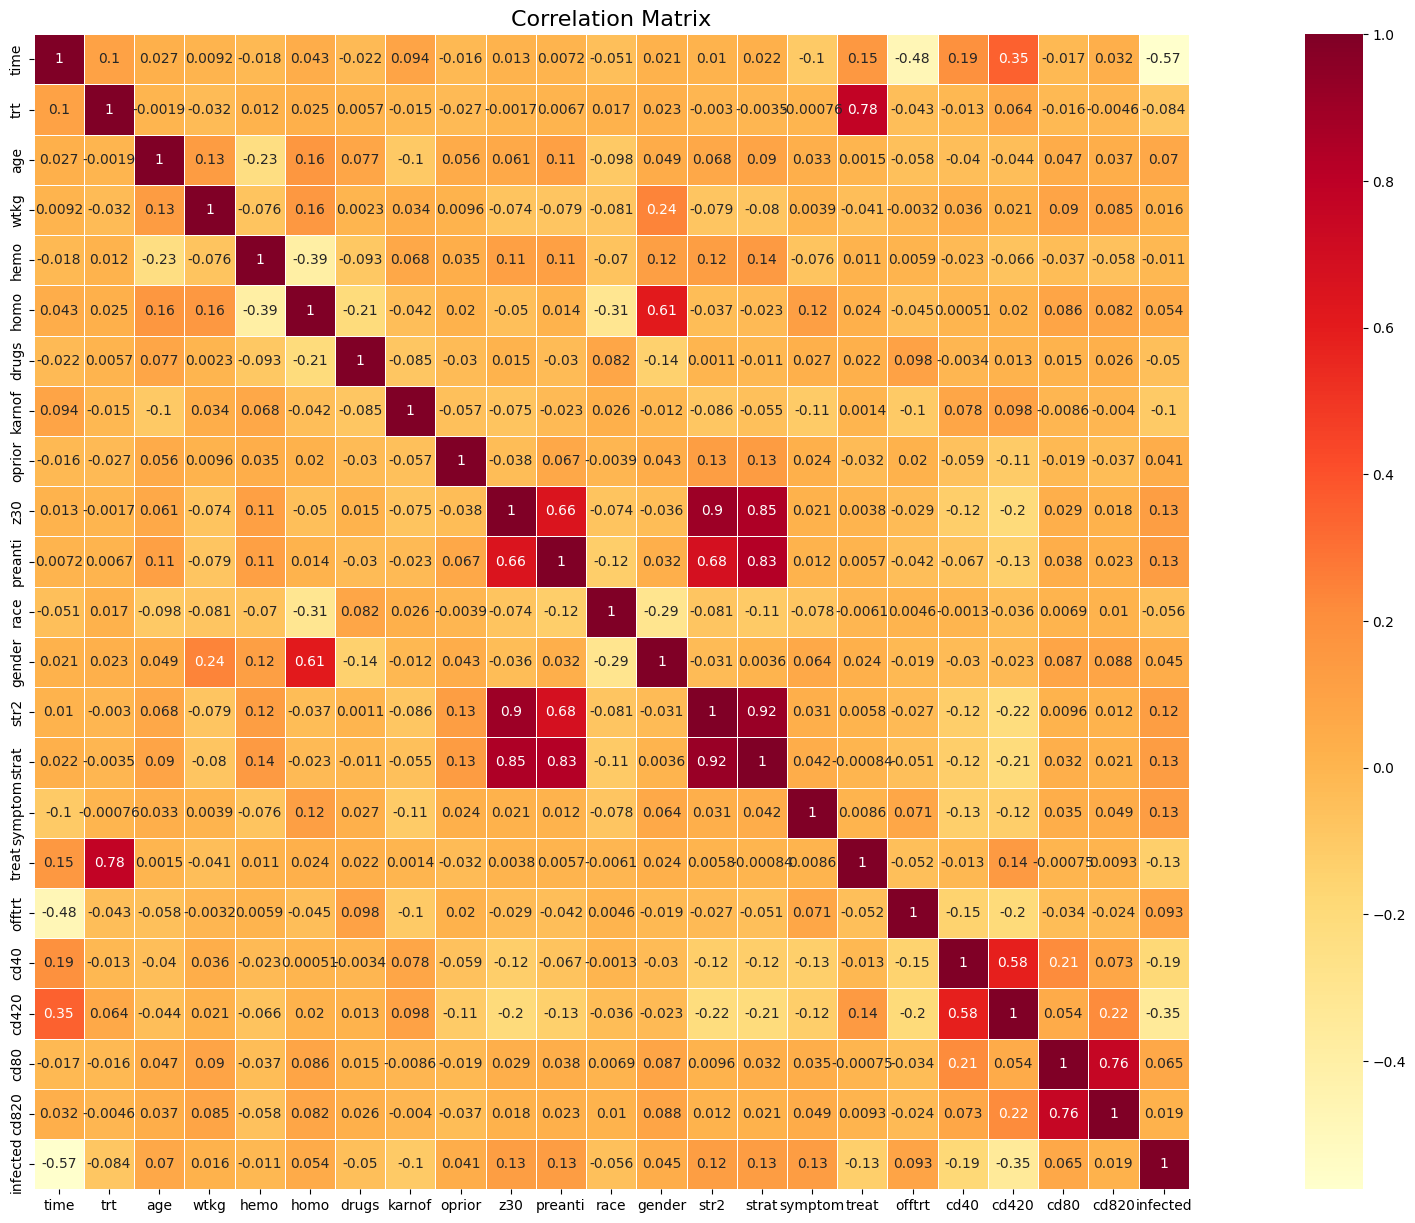

In [10]:
# Heatmap with custom color palette
plt.figure(figsize=(30, 15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', linewidths=0.5, square=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()